<a href="https://colab.research.google.com/github/LeonimerMelo/python/blob/main/Regress%C3%A3o_Polinomial_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Polinomial

**Polynomial Regression** is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial.

Polynomial Regression models are usually fit with the method of least squares.The least square method minimizes the variance of the coefficients,under the Gauss Markov Theorem.

Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.

 <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*_UaCxPswsCxkj9JzYXCiWg.png" alt="Linear Regression" width="800" height="400">

Simple linear regression X Polynomial regression

## Não linearidade

Os modelos de regressão linear ou logística são ótimos para aprender fenômenos simples, nos quais as variáveis interagem de forma linear. Uma interação entre variáveis é linear quando a variação conjunta que acontece nelas é constante. Por exemplo, imagine que você consiga escrever artigos científicos num ritmo de 2 páginas por hora. Nós podemos colocar em um gráfico uma função que diga o número de páginas escritas dado o número de horas trabalhadas. Essa função será uma reta ou linha, daí o nome linear:

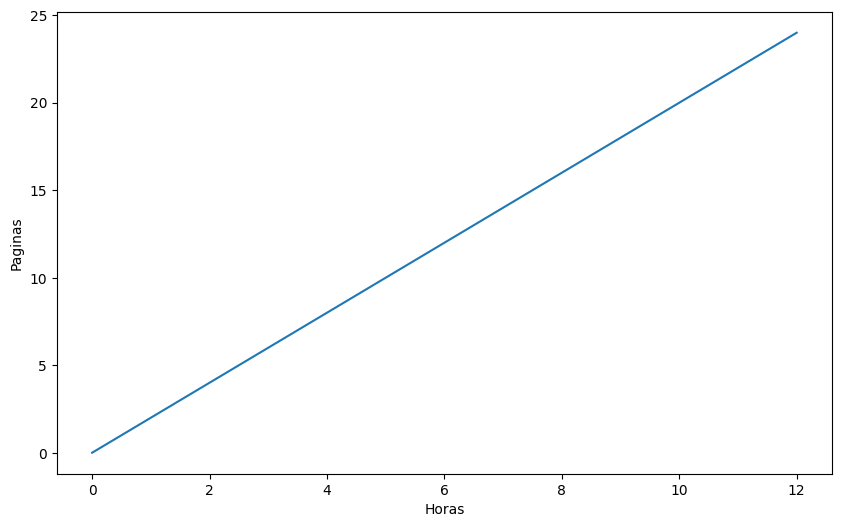

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1)

horas = np.linspace(0,12,20)
paginas = horas * 2
plt.figure(figsize=(10,6)) # figure size
plt.plot(horas, paginas)
plt.ylabel('Paginas')
plt.xlabel('Horas')
plt.show()

Como a relação entre horas trabalhadas e páginas escritas é linear, a variação conjunta que acontece entre elas é constante, ou seja, se você trabalhar uma hora a mais, também escreverá uma página a mais, independentemente da quantidade de horas que já trabalhou naquele dia. Como os modelos lineares ajustam uma reta aos dados (ou acham uma reta de separação, no caso de problemas de classificação), eles são suficientes para aprender esse tipo de relação nos dados.

No entanto, quase nenhuma relação que observamos no mundo é linear, principalmente as de interesse das ciências humanas. No nosso exemplo de páginas escritas por horas trabalhadas, por exemplo. é muito mais provável em uma hora a mais de trabalho se produza menos do que na última hora trabalhada. Isso porque nós geralmente vamos nos cansando ao longo do tempo, o que diminui nossa produtividade. Nesse caso, o aumento de páginas escritas não aumenta de forma constante com um aumento de horas trabalhadas. Provavelmente, você seria bem mais produtivo nas primeira horas de trabalho e então sua produtividade cairia com as horas trabalhadas:

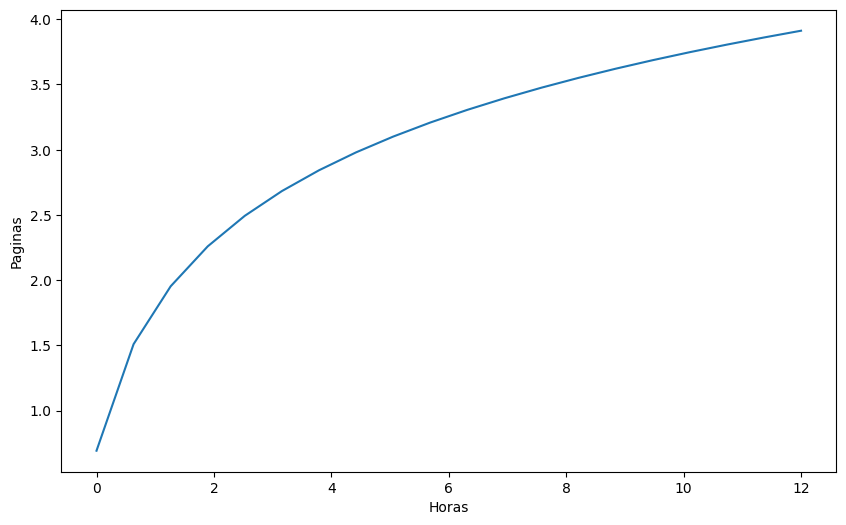

In [ ]:
paginas2 = np.log(paginas*2 + 2)
plt.figure(figsize=(10,6)) # figure size
plt.plot(horas, paginas2)
plt.ylabel('Paginas')
plt.xlabel('Horas')
plt.show()

Assim, a função de páginas escritas por horas trabalhadas não seria mais uma reta, mas sim uma espécie de curva que cresce cada vez menos. Em economia, esse tipo de relação leva o nome de marginal decrescente. Por exemplo, podemos dizer que a produção de páginas é marginalmente decrescentes com a quantidade de horas trabalhadas. As relações marginais decrescentes são tão comuns nas interações humanas que uma grande parte da teoria econômica é dedicada ao estudo aprofundado delas. Apenas para citar alguns exemplos, podemos dizer que a produtividade é marginalmente decrescente com o capital investido, a saciação da fome é marginalmente decrescente com a quantidade de comida ingerida, a satisfação com um hobbie é marginalmente decrescente com o tempo despendido nele, a felicidade é marginalmente decrescente com o salário...

Sê você não consegue ver ainda como todas essas relações são marginalmente decrescentes, não se preocupe. Realmente leva tempo para se acostumar com esses termos técnicos. É preciso entender apenas duas coisas: (1) sempre que as coisas vão perdendo a graça conforme temos mais delas (em quantidade ou tempo), estamos diante de uma relação marginalmente decrescente (2) fenômenos marginalmente decrescentes são extremamente comuns e não são lineares!

Assim, se quizermos utilizar nossas técnicas de Aprendizado de Máquina para entender melhor essas relações, precisaremos aprender as não linearidades de alguma forma.


# Contornando o problema com modelos lineares

Até aqui nossos modelos que aprendemos só foram utilizados para aprender relações lineares. Felizmente, é bastante simples modificá-los para que possamos aprender qualquer tipo de relação nos dados. Na verdade, sequer vamos modificar o algorítmo de treino e a única coisa que precisaremos fazer será forjar algumas variáveis novas a partir dos nossos dados.

Vamos voltar ao nosso exemplo de produtividade e dizer que a quantidade de páginas escritas ($y$) se relaciona da seguinte forma com as horas trabalhadas (x):

$$y= 3x - 0,1x^2 + \epsilon$$

Como sempre, nós ignorantes cientistas não sabemos essa relação, mas conseguimos coletar dados com horas trabalhadas e páginas escritas. Nós então colocamos esses dados em um gráfico e veremos que eles tem mais ou menos a seguinte forma:


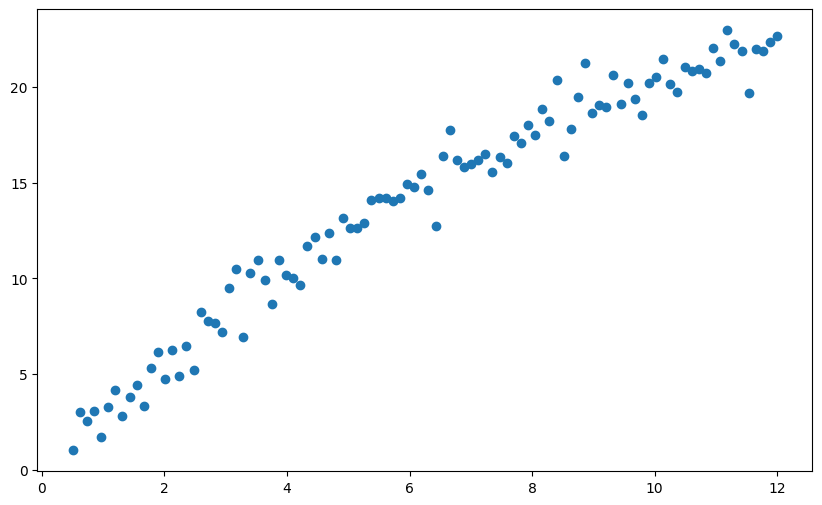

In [ ]:
x = np.linspace(.5,12,100)
y = 3*x - 0.1*(x**2) + np.random.normal(0,1,size=x.shape)

plt.figure(figsize=(10,6)) # figure size
plt.scatter(x, y)
plt.show()

Embora não saibamos exatamente a relação entre páginas escritas e horas trabalhadas, podemos ter quase certeza de que nossa produtividade é marginalmente decrescente com as horas trabalhadas. Nós então decidimos utilizar um modelo de regressão linear para aprender essa relação. Mas para que seja possível aprender a não linearidade, é preciso que criemos novas variáveis que permitam aprenderuma representação não linear.

Nos nossos dados originais, só temos variáveis $x$ e $y$, mas podemos fácil mente criar uma variável que seja $x$ elevado ao quadrado. Assim, nossos dados incluirão uma nova variável: $x^2$. Nós então procedemos normalmente com a regressão linear múltipla de $x$ e $x^2$ em $y$:

In [ ]:
import pandas as pd

# criamos a variável x^2
dados = pd.DataFrame({
    'y': y,
    'x': x,
    'x^2': x**2})

dados.head()

,y,x,x^2
0,1.027871,0.500000,0.250000
1,3.035027,0.616162,0.379655
2,2.546832,0.732323,0.536297
3,3.067040,0.848485,0.719927
4,1.705973,0.964646,0.930543


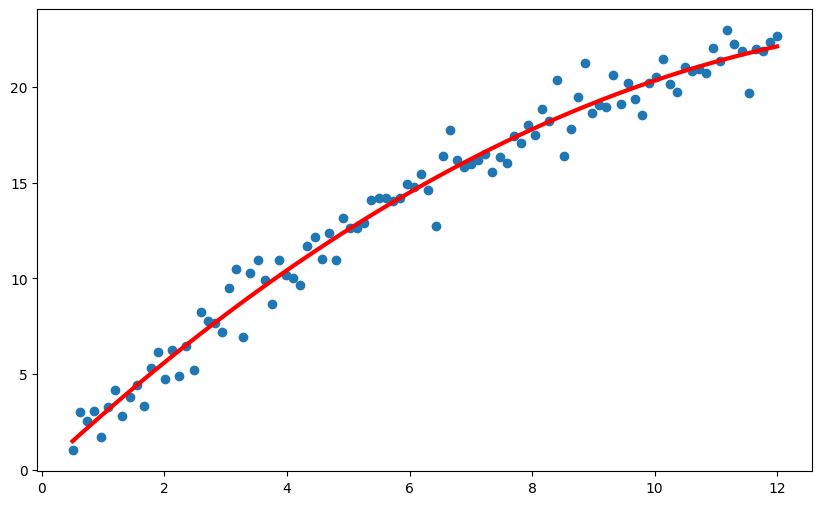

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(dados[['x', 'x^2']], dados[['y']])
line = regr.predict(dados[['x', 'x^2']])

plt.figure(figsize=(10,6)) # figure size
plt.plot(x, line, c='r', lw=3)
plt.scatter(x, y)
plt.show()


Nós conseguimos aprender uma curva que se assemelha muto à função geradora dos dados. No entanto, para isso, foi preciso que soubéssemos qual variável adicionar aos dados (nesse caso, $x^2$). Essa forma de aprender não linearidades tem uma séria desvantagem, que é essa necessidade de saber qual a forma funcional do processo gerador de dados. No exemplo acima, bastaria colocar os dados em um gráfico para saber que havia uma relação marginalmente decrescente. Na maioria das vezes não poderemos fazer isso, pois os dados terão mais dimensões do que caberão em um gráfico. Por exemplo, suponha que o número de páginas escritas não dependa mais apenas das horas de trabalho ($x_1$), mas também da quantidade de sono na noite passada ($x_2$) e do número de xícaras de café ingeridas na última hora ($x_3$). Essa dependência pode ser bem complicada, como por exemplo $y= (3x_1 - 0,1x_1^2) x_2 + 4 * \frac{x_3}{x_2} + \epsilon$. Se não soubermos exatamente a forma funcional dessas relações, isto é, se não soubermos que ela é da forma $y= (Ax_1 - Bx_1^2) x_2 + C * \frac{x_3}{x_2} + \epsilon$, não teremos como ajustar o modelo aos dados.

# Regressão Polinomial
Mesmo sem saber a forma funcional do processo gerador de dados, podemos desenvolver uma técnica geral que funciona bem para problemas de relações não lineares. Em primeiro lugar, é preciso lembrar que, teoricamente, podemos aproximar qualquer função com um polinômio. Então, nós vamos utilizar esse fato para estender regressão linear para regressão polinomial. A ideia é bastante simples: a partir das variáveis existentes, nós vamos construindo novas variáveis polinomiais e a regressão com elas terá mais capacidade quanto maior o grau do polinômio criado. É importante ressaltar que o algorítmo de regressão linear não muda! A única coisa que muda é que agora forjamos várias variáveis polinomias, por exemplo, elevando elas ao quadrado, ao cubo, à quarta, etc.

Vamos considerar um outro exemplo ilustrativo, no qual o crescimento do PIB brasileiro seja uma função sazonal do tempo, com picos e vales, mais uma tendência ascendente. Nós podemos simular dados dessa forma com a função seno. Particularmente, vamos supor que

$$PIB = sen\big(\frac{t}{1.5}\big) + 0.1t + \epsilon$$

A função seno só pode ser aproximada com um polinômio de grau infinito, mas nós podemos produzir uma bom resultado nos dados acima com polinômios de menor grau. Particularmente, vamos ajustar 3 modelos, um com polinômio de grau 2, outro com polinômio de grau 4 e outro, com grau 11. Para criar as variáveis polinomiais, vamos utilizar uma função já pronta do Sklearn:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
np.random.seed(3)
# scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.
scale=0.15
# loc: Mean (“centre”) of the distribution.
loc=0

# Função de crescimento do PIB
def f(x):
    return np.sin(x/1.5) + x*.1 + np.random.normal(loc, scale, size=x.shape)

In [ ]:
# Gera 100 pontos do eixo x (0 a 15)
x_plot = np.linspace(0, 15, 100)
x = np.linspace(0, 15, 100)
# Embaralha os dados
rng = np.random.RandomState(0)
rng.shuffle(x)
# usa um subset para treino (10 dados)
x_train = np.sort(x[:10])
# usa um subset para teste (90 dados)
x_test = np.sort(x[10:])
# gera a função de crescimento do PIB (treino)
y = f(x_train)
# gera a função de crescimento do PIB (teste)
y_test = f(x_test)
# transforma X em matriz coluna. O mesmo que: X = x_train.reshape(-1,1)
X = x_train[:, np.newaxis]
# o mesmo que: X_plot = x_plot.reshape(-1,1)
X_plot = x_plot[:, np.newaxis]

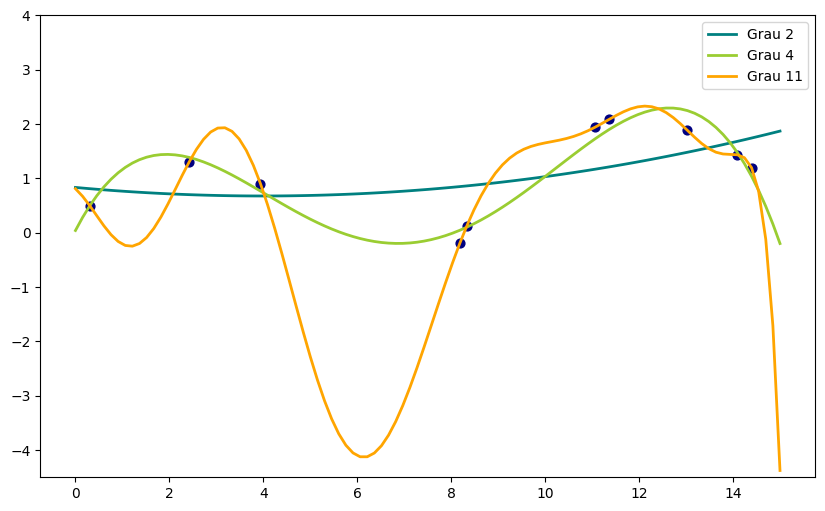

In [ ]:
# parâmetros do gráfico
colors = ['teal', 'yellowgreen', 'orange', 'red', 'green']
lw = 2

plt.figure(figsize=(10,6)) # figure size

# ajusta polinômios de graus 2, 4 e 11.
for count, degree in enumerate([2, 4, 11]):

    # cria as variáveis polinomiais e as passa pelo modelo de regressão linear
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # coloca as previsões no gráfico
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="Grau %d" % degree)

plt.scatter(x_train, y, color='navy', s=40, marker='o')
plt.ylim([-4.5,4])
plt.legend(loc='best')
plt.show()

Note como a capacidade de ajustamento aos dados é mais forte conforme aumentamos o grau do polinômio. Isso traz a tona o tradeoff entre capacidade e generalização. No caso acima, por exemplo, o modelo com polinômio de grau 11 acerta todos os dados de treinamento, mas é provável que a variância dele seja muito alta, podendo comprometer a performance de generalização. Por outro lado, o modelo com polinômio de grau 2 não consegue sequer capturar as curvaturas do dado de treino. Assim, podemos especular que esse modelo sofre com muito viés e está sub-ajustado. Por fim, o modelo com polinômio de grau 4 parece se ajustar bem aos dados, sem acertá-los perfeitamente. É provável que esse seja o nosso melhor modelo, em termos de erro de generalização.

No entanto, nós só podemos ter certeza vendo a performance dos modelos treinados acima em um set de dados de teste, isto é, que não foi utilizado para o treinamento dos modelos. Apenas assim ficará claro que o modelo com grau 2 está sub-ajustando, o modelo com grau 11 está sobre-ajustando e o modelo com grau 4 parece ajustar bem

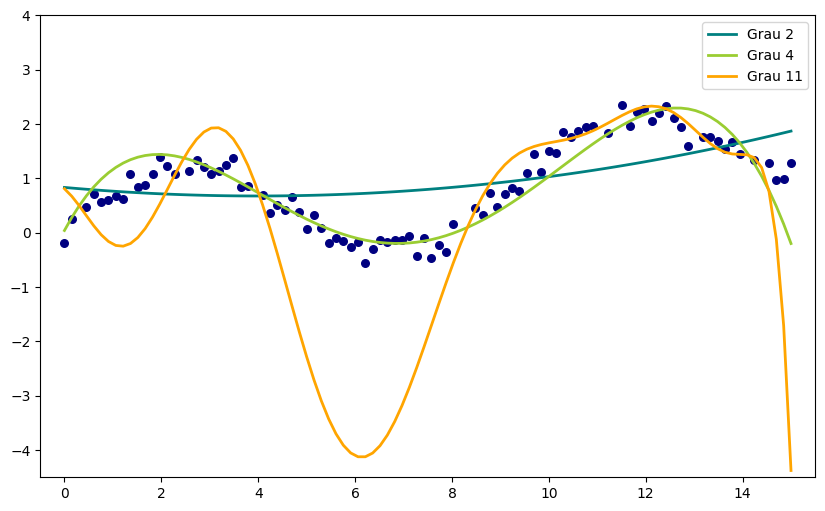

In [ ]:
plt.figure(figsize=(10,6)) # figure size
# ajusta polinômios de graus 2, 4 e 11.
for count, degree in enumerate([2, 4, 11]):

    # crias as variáveis polinomiais e as passa pelo modelo de regressão linear
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # coloca as previsões no gráfico
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="Grau %d" % degree)

plt.scatter(x_test, y_test, color='navy', s=30, marker='o')
plt.ylim([-4.5,4])
plt.xlim([-.5,15.5])
plt.legend(loc='best')

plt.show()

## Considerações Finais

Vale aqui ressaltar algumas desvantagens do modelo de regressão polinomial e deixar algumas recomendações para quando utilizá-lo e quando não. Uma grande limitação do modelo de regressão linear é que a máquina não aprende a forma da não linearidade, ficando essa parte sob responsabilidade da pessoa que está montando o modelo. Em outras palavras, é preciso codificar à força a não linearidade no algoritmo e isso é feito forjando variáveis novas. Por muito tempo, essa foi a principal forma de aprender não linearidade, mas hoje existem métodos muito mais eficientes para isso. A segunda desvantagem do modelo de regressão polinomial é que ele não funciona bem quando tempo muitas variáveis e o grau do polinômio é muito alto. Isso porque o número de variáveis cresce exponencialmente com o grau do polinômio ajustado, tornando o aprendizado impraticável rapidamente.

Assim, é recomendável utilizar regressão polinomial apenas em casos de não linearidade mais simples, por exemplo quando se desconfia de alguma relação marginalmente decrescente (ou marginalmente crescente). Nesses casos, utilizar um polinômio de grau dois basta e polinômio com grau superior tendem a sobre-ajustar.

## Exercícios

1. Utiliza o parâmentro `scale=0.3 `da função `numpy.random.normal` utilizado para gerar a função de crescimento do PIB.
2. Gere um banco de dados com 200 amostras baseado na função de crescimento do PIB com `x` variando de 0 à 20.
3. Separar o banco de dados com 20% para treino e 80% para teste e comparar os resultados;
4. Utilizar polinomios de grau 3, 5, 7 e 9 verificar quais tem melhor performance para o sistema em questão.
5. Modificar o banco de dados com 50% para treino e 50% para teste e comparar os resultados com os anteriores.
6. Fazer previsão de valor futuro para `x` = 25, 30 e 50. Comparar os resultados com os valores reais e identificar qual grau de polinômio apresenta as melhores previsões para estes valores.
7. Coloque nomes nos gráficos e nos eixos x e y.
8. Utilizar métricas (MSE, R2) para veficar a performance do algoritmo.

## Referências
[1] https://matheusfacure.github.io/2017/02/26/regr-poli/

[2] https://github.com/matheusfacure/Tutoriais-de-AM/tree/master/Regress%C3%A3o%20Linear

[3] http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

[4] https://acervolima.com/python-implementacao-de-regressao-polinomial/

[5] https://www.sakurai.dev.br/regressao-polinomial/

[6] https://www.w3schools.com/python/python_ml_polynomial_regression.asp

[7] https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

[8] https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

### Contribuições dos alunos

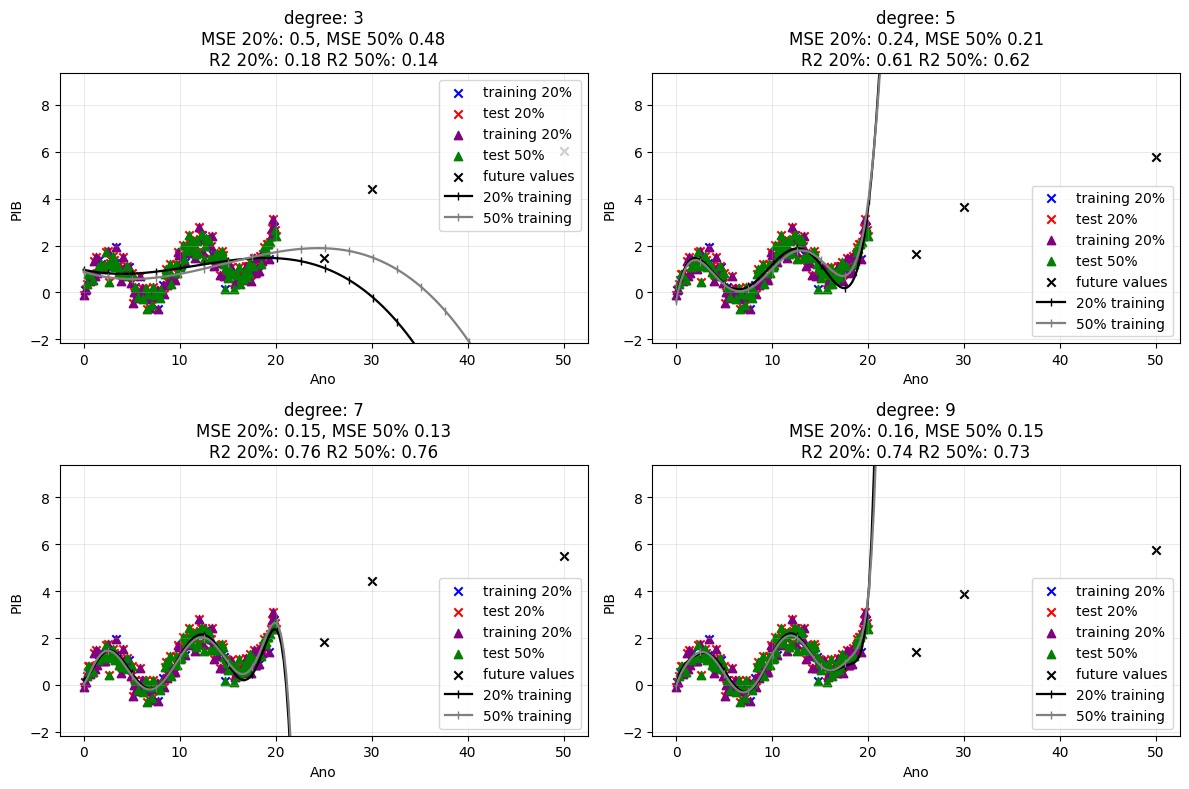

In [ ]:
# Exemplo de Regressão Polinomial
# Contribuição de Marcelo Henrique Jeronymo <marcelo.henrique@uel.br>
#
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from matplotlib import pyplot as plt

# Função de crescimento do PIB
def f(x, loc, scale): return np.sin(x/1.5) + x*.1 + np.random.normal(loc, scale, size=x.shape)

scale = 0.3
x = np.linspace(0, 20, 200)[:, np.newaxis]
y = f(x, 0, scale)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)
x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(x, y, train_size=0.5)

degrees = [3, 5, 7, 9]

fig, ax = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
ax_mod = ax.reshape(-1)

for i, degree in enumerate(degrees):
    model1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model1.fit(x_train, y_train)
    model2.fit(x_train_50, y_train_50)

    y_pred = model1.predict(x_test)
    y_pred_50 = model1.predict(x_test_50)

    MSE_20 = mean_squared_error(y_test, y_pred)
    MSE_50 = mean_squared_error(y_test_50, y_pred_50)

    R2_20 = r2_score(y_test, y_pred)
    R2_50 = r2_score(y_test_50, y_pred_50)

    ax_mod[i].scatter(x_train, y_train, marker="x", color="blue", label="training 20%")
    ax_mod[i].scatter(x_test, y_test, marker="x", color="red", label="test 20%")

    ax_mod[i].scatter(x_train_50, y_train_50, marker='^', color="purple", label="training 20%")
    ax_mod[i].scatter(x_test_50, y_test_50, marker='^', color="green", label="test 50%")

    x_plot = np.linspace(np.min(x), 50, 200)[:, np.newaxis]

    y_plot = model1.predict(x_plot)
    y_plot_50 = model2.predict(x_plot)

    x_plot_extended = np.array([25, 30, 50])
    y_plot_extended_true = f(x_plot_extended, 0, scale)

    ax_mod[i].scatter(x_plot_extended, y_plot_extended_true, marker="x", color="black", label="future values")

    ax_mod[i].plot(x_plot, y_plot, lw=1.618, marker='|', markevery=10, color="black", label="20% training")
    ax_mod[i].plot(x_plot, y_plot_50, lw=1.618, marker='|', markevery=10, color="gray", label="50% training")
    ax_mod[i].set_title(f"degree: {degree}\nMSE 20%: {np.round(MSE_20, 2)}, MSE 50% {np.round(MSE_50, 2)}\nR2 20%: {np.round(R2_20, 2)} R2 50%: {np.round(R2_50, 2)}")


for axis in ax_mod:
    axis.grid(lw=0.4, alpha=0.5)
    axis.legend()
    axis.set_xlabel("Ano")
    axis.set_ylabel("PIB")
    axis.set_ylim([3*np.min(y), 3*np.max(y)])

plt.show()

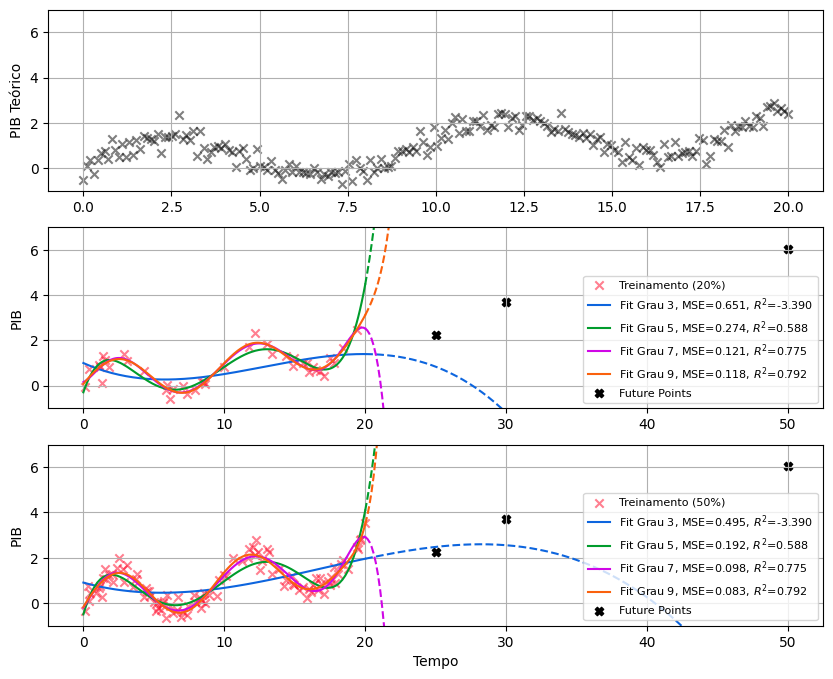

In [ ]:
# Exemplo de Regressão Polinomial
# Contribuição de Gabriel Delongui Polvani <gabriel.polvani@uel.br>
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def f(x, l=0, s=0.3):
    return np.sin(x/1.5) + 0.1*x + np.random.normal(loc=l, scale=s, size=x.shape)

x = np.linspace(start=0, stop=20, num=200)
x_plot20 = np.linspace(0, 20, num=160)
x_plot50 = np.linspace(0, 20, num=100)
y = f(x)

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(10,8), sharex=False, sharey=True) # Plots

# Plotando todos os pontos gerados:
ax[0].scatter(x, y, marker='x', color='#000000', alpha=0.5)
ax[0].grid()

x_shuffle = np.random.shuffle(x)
x_train20, x_test20 = x[:40], x[40:]
y_train20, y_test20 = f(x_train20), f(x_test20)
x_train50, x_test50 = x[:100], x[100:]
y_train50, y_test50 = f(x_train50), f(x_test50)

x_future = np.linspace(start=20, stop=50, num=200)

# Plotando os pontos de treinamento:
ax[1].scatter(x_train20, y_train20, color='#FF0022', marker='x', alpha=0.5, label='Treinamento (20%)')
ax[2].scatter(x_train50, y_train50, color='#FF0022', marker='x', alpha=0.5, label='Treinamento (50%)')
ax[1].grid(), ax[2].grid()

# Cores dos plots:
colors=['#0D65DE', '#009C2C', '#D007E6', '#FA610D']

# Analisando os diversos fits polinomiais:
for i, n in enumerate([3, 5, 7, 9]):

    # Criando os modelos:
    model20 = make_pipeline(PolynomialFeatures(n), LinearRegression())
    model50 = make_pipeline(PolynomialFeatures(n), LinearRegression())
    model20.fit(x_train20[:, np.newaxis], y_train20[:, np.newaxis])
    model50.fit(x_train50[:, np.newaxis], y_train50[:, np.newaxis])

    y_plot20 = model20.predict(x_plot20[:, np.newaxis])
    y_plot50 = model50.predict(x_plot50[:, np.newaxis])

    y_pred20 = model20.predict(x_test20[:, np.newaxis])
    y_pred50 = model50.predict(x_test50[:, np.newaxis])

    y_future20 = model20.predict(x_future[:, np.newaxis])
    y_future50 = model50.predict(x_future[:, np.newaxis])

    ax[1].plot(x_plot20, y_plot20.flatten(), color=colors[i], lw=1.5, label=f'Fit Grau {n}, MSE={mean_squared_error(y_pred20, y_test20):.3f}, $R^2$={r2_score(y_pred20, y_test20):.3f}')
    ax[2].plot(x_plot50, y_plot50.flatten(), color=colors[i], lw=1.5, label=f'Fit Grau {n}, MSE={mean_squared_error(y_pred50, y_test50):.3f}, $R^2$={r2_score(y_pred20, y_test20):.3f}')

    # Future plots:
    ax[1].plot(x_future, y_future20.flatten(), color=colors[i], lw=1.5, ls='--')
    ax[2].plot(x_future, y_future50.flatten(), color=colors[i], lw=1.5, ls='--')

# Future points:
fp = np.array([25, 30, 50])
y_fp = f(fp)

ax[1].scatter(fp, y_fp, color='#000000', marker='X', label='Future Points')
ax[2].scatter(fp, y_fp, color='#000000', marker='X', label='Future Points')

ax[1].legend(fontsize=8, ncols=1, loc='lower right'), ax[2].legend(fontsize=8, ncols=1, loc='lower right')
ax[0].set_ylim([-1,7])
ax[2].set_xlabel('Tempo')
ax[0].set_ylabel('PIB Teórico'), ax[1].set_ylabel('PIB'), ax[2].set_ylabel('PIB')

plt.show()